In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Import ‘Movie_collection’ csv files in data_x and data_y variables.

In [3]:
# Import ‘Movie_collection’ csv files in data_x and data_y variables.
data_x=pd.read_csv(r'C:\Users\akash\Desktop\course\Deep Learning\Assignment_4_data\Movie_collection_Independent.csv',header=0)
data_y=pd.read_csv('C:/Users/akash/Desktop/course/Deep Learning/Assignment_4_data/Movie_collection_Target.csv',header=0)
data_x.shape

(506, 19)

## Look at the shape and first five rows of both dataframes to understand the data

In [27]:
# Look at the shape and first five rows of both dataframes to understand the data
data_y.shape

(506, 1)

In [28]:
data_x[:5]

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [29]:
data_y[:5]

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


## Split the data into test, train, and validation

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

#Splits the dataset in the ratio of 3:1 or 75% and 25%

X_train_full,X_test,y_train_full,y_test=train_test_split(data_x,data_y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)


## Take a look at the shape of the test, train, and validation set

In [31]:
X_train.shape

(284, 19)

In [32]:
X_valid.shape

(95, 19)

In [33]:
X_test.shape

(127, 19)

## Standardize the data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

## Create an ANN model with 2 dense layers of 30 neurons each

In [36]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

## Compile the model with loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-2) and metrics=['mae'])

In [37]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])
# mae=mean absolute error

## Train the model for 100 epochs

In [44]:
model_history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1101 - mae: 0.2472 - val_loss: 0.1355 - val_mae: 0.2809
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1099 - mae: 0.2467 - val_loss: 0.1350 - val_mae: 0.2803
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1096 - mae: 0.2466 - val_loss: 0.1347 - val_mae: 0.2799
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1093 - mae: 0.2463 - val_loss: 0.1343 - val_mae: 0.2794
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1091 - mae: 0.2460 - val_loss: 0.1340 - val_mae: 0.2790
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1089 - mae: 0.2458 - val_loss: 0.1337 - val_mae: 0.2786
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1086 - mae: 0.2454 - val_loss: 0.1334 - val_mae: 0.2782
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1083 - mae: 0.2454 - va

## Evaluate the model performance on the test set

In [45]:
mae_test=model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4137 - mae: 0.3356


In [46]:
model_history.history

{'loss': [0.11005809158086777,
  0.10985172539949417,
  0.1095711812376976,
  0.10932521522045135,
  0.10905466228723526,
  0.10889730602502823,
  0.10860476642847061,
  0.1083221510052681,
  0.10811761021614075,
  0.10794322937726974,
  0.10759515315294266,
  0.10740941762924194,
  0.10718376189470291,
  0.10697422176599503,
  0.10662733018398285,
  0.10651474446058273,
  0.10626053065061569,
  0.10602658241987228,
  0.10580618679523468,
  0.10551999509334564,
  0.10538050532341003,
  0.10511894524097443,
  0.10488878190517426,
  0.10469617694616318,
  0.10446460545063019,
  0.10425997525453568,
  0.10407693684101105,
  0.10392523556947708,
  0.10363101214170456,
  0.10347111523151398,
  0.10319584608078003,
  0.10302841663360596,
  0.10278142243623734,
  0.10264667123556137,
  0.10240933299064636,
  0.10217762738466263,
  0.1020205020904541,
  0.1017497330904007,
  0.10157864540815353,
  0.10141970962285995,
  0.10128100961446762,
  0.10106392204761505,
  0.10083583742380142,
  0.100

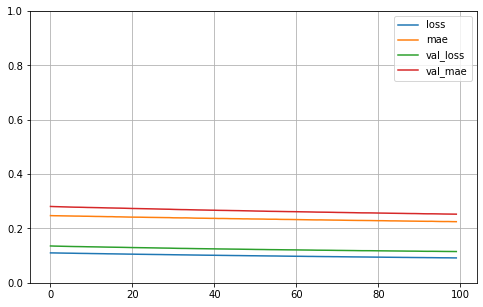

In [47]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Predict the values of the first 5 test records

In [48]:
X_new=X_test[:5]

In [49]:
y_pred=model.predict(X_new)
print(y_pred)  #Predicted values
print(y_test[:5]) #Original Values

[[2.5451803]
 [2.551341 ]
 [1.89748  ]
 [2.282321 ]
 [1.6840097]]
     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000
